# Heart attack analysis. EDA and prediction

We have data on patients seen by a cardiologist. The main goal of this notebook is to build a machine learning model, that will be able to predict the risk of a heart attack based on a patient's health condition.

Here we have the description of the features:

age - age in years

sex - sex (0 = female; 1 = male)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trtbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (0 = false; 1 = true)

restecg - resting electrocardiographic results (0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality)

thalachh - maximum heart rate achieved

exng - exercise induced angina (0 = no; 1 = yes)

oldpeak - ST depression induced by exercise relative to rest

slp - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)

caa - number of major vessels (0-4) colored by flourosopy

thall - thallium stress test (1 = fixed defect; 2 = reversable defect; 3 = normal)

output - 0 = less chance of heart attack; 1 = more chance of heart attack

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
df=pd.read_csv('heart attack.csv')


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

1.The dataset includes information about 303 patients.

2.There are 13 features. Even though all of them are numeric type, only 5 are really numerical, the rest are categorical.

            categorical features : sex, cp, fbs, restecg, exng, slp, caa, thall
   
            numerical features : age, trtbps, chol, thalachh, oldpeak

3.The target is output. 0 is low risk patient, 1 is high risk patient.

4.There are no missing values.

# Data Cleaning

In [7]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


There is one duplicate we observed and delete it

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

<AxesSubplot:>

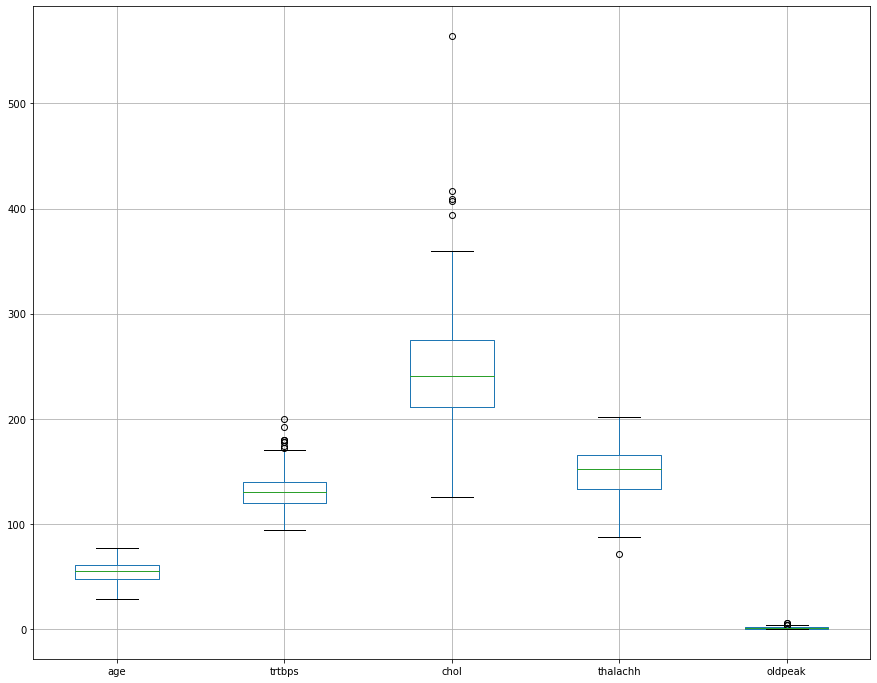

In [9]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])  

No outliers are present in age attribute but there are outliers in trtbps, chol, thalachh and oldpeak attributes. 
So we need to get the exact values of outliers using IQR method.

In [10]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalachh attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


No outliers in age attribute

Outliers in trtbps attribute : 172, 174, 178, 178, 180, 180, 180, 192, 200

Outliers in chol attribute : 394, 407, 409, 417, 564

Outliers in thalachh attribute : 71

Outliers in oldpeak attribute : 4.2, 4.2, 4.4, 5.6, 6.2


Now we need to handle these outlier using Quantile based flooring and capping method.

In [11]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])



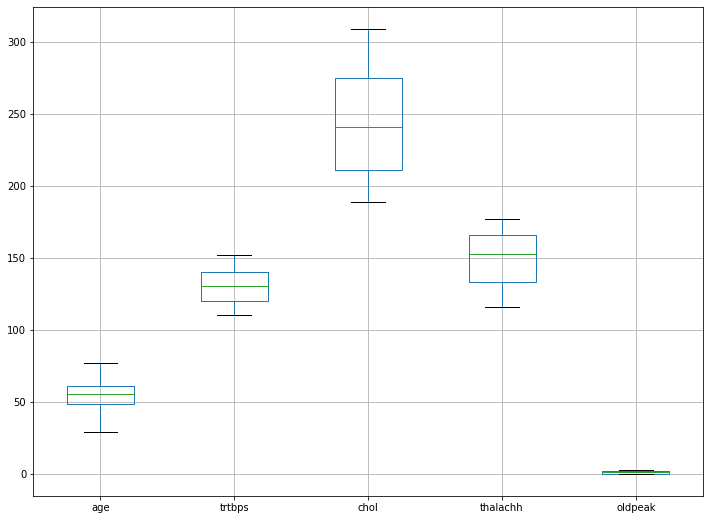

In [12]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']);

# Visualization

In this section, we will get an idea about our patients by considering all the features separately.

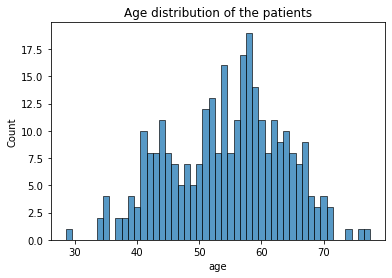

In [13]:
#Age
sns.histplot(df.age, discrete=True)
plt.title('Age distribution of the patients')
plt.show()

The dataset contains information about older patients, which is to be expected. The majority of the patients are older than 40.  The peak is at 57-58 years old.

In [14]:
#Gender
df.sex.value_counts().to_frame()

,sex
1,206
0,96


0=Female

1=Male

We have almost 2 times more males than females

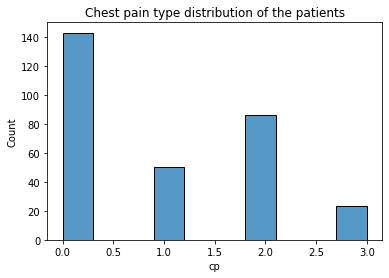

In [15]:
#Chest pain type
sns.histplot(df.cp)
plt.title('Chest pain type distribution of the patients')
plt.show()

1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic

Almost a half of the patients have no pain in the chest

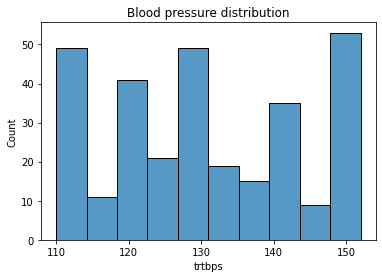

In [16]:
#Resting blood pressure
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

        Category           Blood pressure

        Optimal	              < 120

        Normal	              120–129

        High normal	         130–139

        Grade 1 hypertension	140–159

        Grade 2 hypertension	160–179

        Grade 3 hypertension	 ≥ 180

In our dataset, the resting blood pressure distribution has a peak at a value of approx. 150

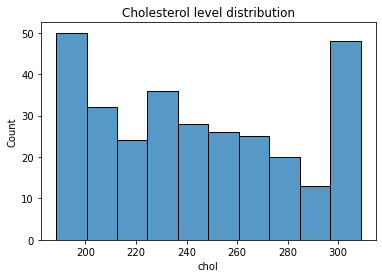

In [17]:
#Cholesterol
sns.histplot(df.chol)
plt.title('Cholesterol level distribution')
plt.show()

In [18]:
#Fasting blood sugar
df.fbs.value_counts().to_frame()

,fbs
0,257
1,45


Reminder: 0 means less or equal to 120 mg/dl (which is good), 1 means higher than 120 mg/dl.

The majority of the patients don't have serious sugar problems.

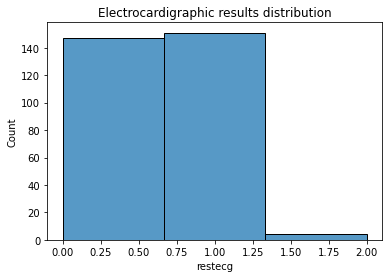

In [19]:
#Resting electrocardiographic results
sns.histplot(df.restecg, bins=3)
plt.title('Electrocardigraphic results distribution')
plt.show()

0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality

About 50% of the patients have hypertrophy. Only a few of the patients have ST-T wave abnormality. The rest of them have normal results.

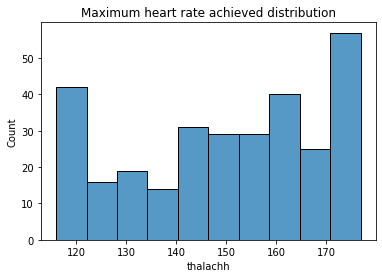

In [20]:
#Maximum heart rate achieved
sns.histplot(df.thalachh)
plt.title('Maximum heart rate achieved distribution')
plt.show()

In our dataset, highest value for thalachh is apprx. 170-180

In [21]:
#Exercise-induced angina
df.exng.value_counts().to_frame()

,exng
0,203
1,99


0 = no; 1 = yes

Almost one-third of the patients have exercise-induced angina.

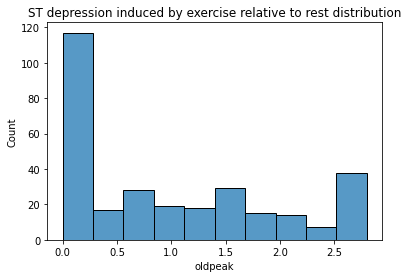

In [22]:
#ST depression induced by exercise relative to rest
sns.histplot(df.oldpeak)
plt.title('ST depression induced by exercise relative to rest distribution')
plt.show()

The peak is at 0.   
0-1 is normal.

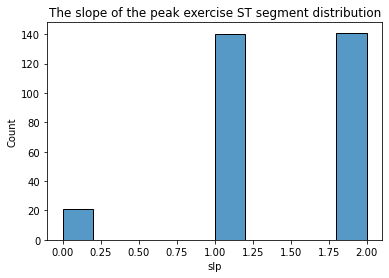

In [23]:
#The slope of the peak exercise ST segment
sns.histplot(df.slp, discrete=False)
plt.title('The slope of the peak exercise ST segment distribution')
plt.show()

0 = downsloping; 1 = flat; 2 = upsloping   
The slope of peak exercise ST segment (slp) is mostly flat and upsloping.

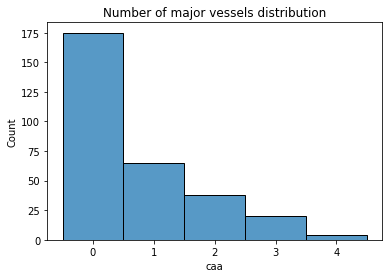

In [24]:
#Number of major vessels
sns.histplot(df.caa, discrete=True)
plt.title('Number of major vessels distribution')
plt.show()

number of major vessels (0-4) colored by flourosopy

More than a half of the patients do not have major vessels

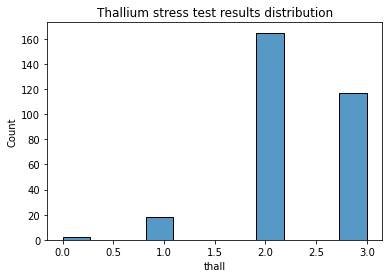

In [25]:
#Thallium stress test
sns.histplot(df.thall, discrete=False)
plt.title('Thallium stress test results distribution')
plt.show()

Thallium stress test (1 = fixed defect; 2 = reversable defect; 3 = normal)
    
Approx. more than 50% of the patients have reversable defect. One weird thing is observed. We have patients that have "0", but there is no information about this label in the feature description. Let's have a look at these rows.

In [26]:
df.query('thall == 0')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128.0,216.0,0,0,116.0,0,0.0,2,0,0,1
280,52,1,0,128.0,204.0,1,1,156.0,1,1.0,1,0,0,0


In [27]:
from sklearn.impute import KNNImputer

In [28]:
df['thall'] = df['thall'].replace({0 : np.nan})

In [29]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['thall'] = df['thall'].round()

In [30]:
df['thall'].unique()

array([1., 2., 3.])

In [31]:
print(df.iloc[48]['thall'],df.iloc[280]['thall'])

3.0 2.0


By applying KNNImputer, Zero in thall feature is replaced accordingly.

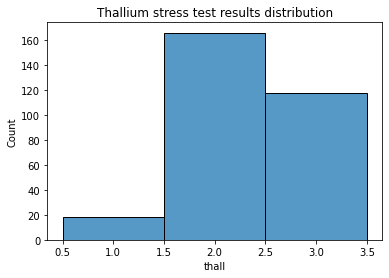

In [32]:
#Thallium stress test
sns.histplot(df.thall, discrete=True)
plt.title('Thallium stress test results distribution')
plt.show()

In [33]:
#The chance of heart attack
df.output.value_counts().to_frame()

,output
1.0,164
0.0,138


 0 = less chance of heart attack; 1 = more chance of heart attack

In [34]:
df.output.value_counts(normalize=True).to_frame()*100

,output
1.0,54.304636
0.0,45.695364


54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.

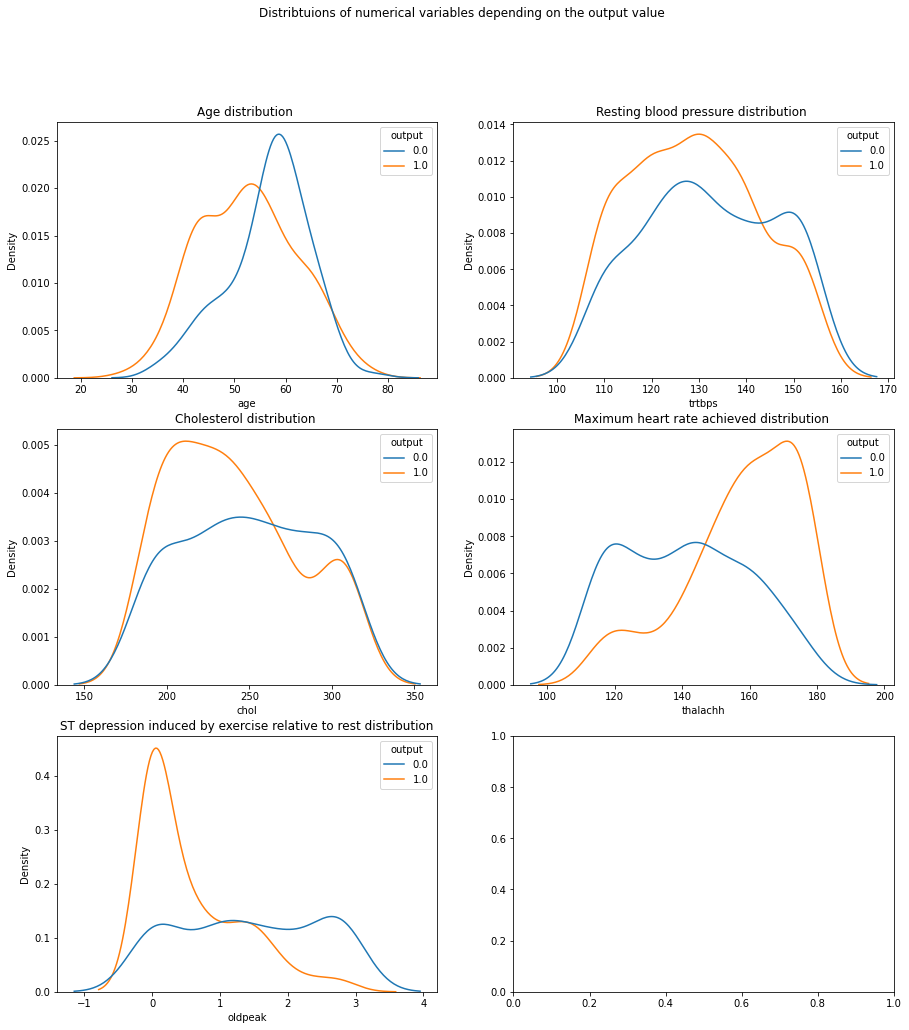

In [35]:
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=df, x='chol', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=df, x='oldpeak', hue='output', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
plt.suptitle('Distribtuions of numerical variables depending on the output value')
plt.show()

1.From the distributions, it can be observed that cholesterol level and blood pressure do not affect the chance of heart attack.

2.Another interesting observation is that relatively younger people more prone to have a heart attack.

3.Maximum heart rate achieved and ST depression induced by exercise relative to rest have an ifluence on the output.

Our dataset is built the way when the low categorical value means a good condition, and high categorical value means a bad condition (exng is equal to 0 when no angina, restecg is equal to 0 when normal results). Only one exception is thall feature. Let's change this by mapping.

In [36]:
df['thall'] = df['thall'].map({3 : 0, 1 : 2, 2 : 1})

Now we have the following labels:

0 = normal
1 = reversable defect
2 = fixed defect

4 of our categorical features (cp, restecg, exng, and thall) can be considered as analyzes with relatively simple interpretation for us. And taking into account the encoding system, the lower the value - the better the health condition. So we can assume that combination of these parameters can affect the target. For example, let's check the patients that have the best health condition based on these features

In [37]:
df.query('cp == 0 and restecg == 0 and exng == 0 and thall == 0')['output'].value_counts()

0.0    13
Name: output, dtype: int64

All of them are not in the risk group.

We can combine these features by simply summarizing them. And then check distributions for the different outputs.

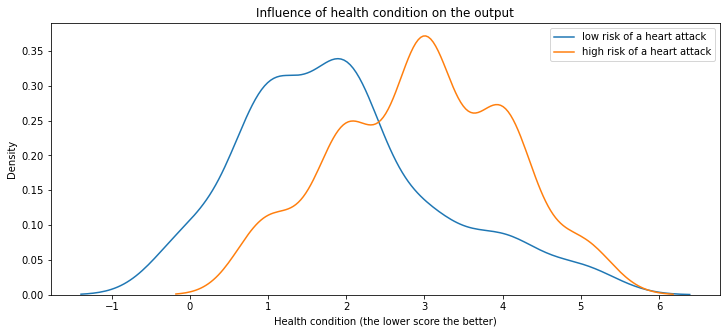

In [38]:
plt.figure(figsize=(12,5))
df_0 = df.query('output == 0')
df_1 = df.query('output == 1')
sns.kdeplot(df_0.cp + df_0.restecg + df_0.exng + df_0.thall, label='low risk of a heart attack')
sns.kdeplot(df_1.cp + df_1.restecg + df_1.exng + df_1.thall, label='high risk of a heart attack')
plt.title('Influence of health condition on the output')
plt.xlabel('Health condition (the lower score the better)')
plt.legend()
plt.show()


The conclusion is that people with good health condition has a lower chance to a heart attack.

Text(0.5, 1.0, 'Correlation map')

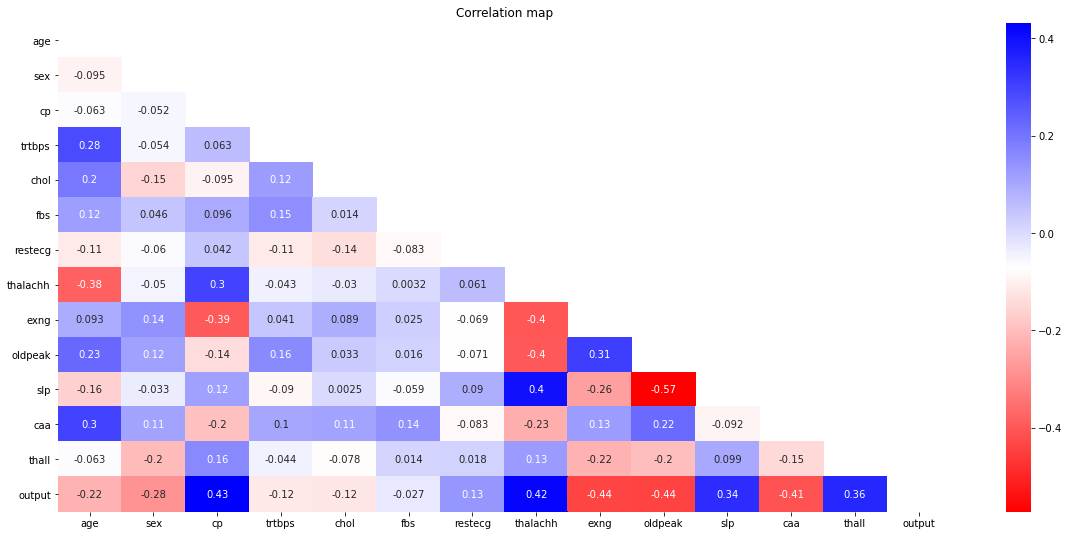

In [39]:
#Finding the correlation

matrix = np.triu(df.corr())
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),mask=matrix,annot=True,cmap='bwr_r');
plt.title("Correlation map")

From the above heatmap we can observe that the features 'cp', 'thalachh', 'exng', 'oldpeak' and 'caa' are highly correlated to output (target variable).

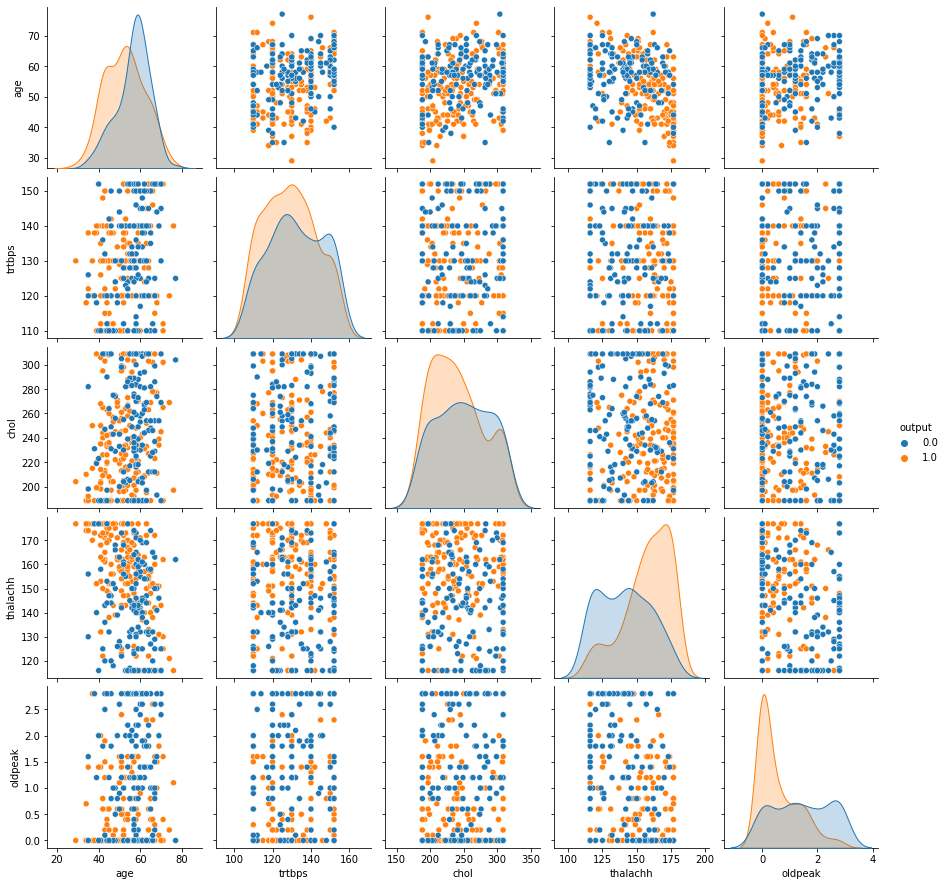

In [40]:
# pairplot for numeric columns

sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')

From the above pair plot we can conclude that our dataset is not linearly separable.




# Conclusion  (Visualization):

1.The majority of the patients are older than 40.

2.In the dataset there are 2 times more males than females.

3.54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.

4.Age distribution of patients from the high-risk group has a peak at 57-58 ages.

5.Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.

6.The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels

# Feature Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
df[['age','trtbps','chol','thalachh','oldpeak']]=scale.fit_transform(df[['age','trtbps','chol','thalachh','oldpeak']])

In [42]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,3.0,0.833333,0.370124,1.0,0.0,0.559211,0.0,0.821429,0.0,0.0,2,1.0
1,0.166667,1.0,2.0,0.476190,0.511203,0.0,1.0,1.000000,0.0,1.000000,0.0,0.0,1,1.0
2,0.250000,0.0,1.0,0.476190,0.129461,0.0,0.0,0.921053,0.0,0.500000,2.0,0.0,1,1.0
3,0.562500,1.0,1.0,0.238095,0.395021,0.0,1.0,1.000000,0.0,0.285714,2.0,0.0,1,1.0
4,0.583333,0.0,0.0,0.238095,1.000000,0.0,1.0,0.773026,1.0,0.214286,2.0,0.0,1,1.0


# Data Preparation

In [43]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [44]:
#split dataset in features and target variable

feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg','fbs','thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[feature_cols] # Features
y = df.output # Target variable

So, we are preparing the data by spliting the features as X and Y ,Here X defines the feature columns and Y defines the target variable

In [45]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) # 80% training and 20% test

Here splitting the dataset into train set and test set with the size of 80% and 20%

# Classification models

In this section, we will implement several models and compare their performance.

In [46]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # SVM
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Byes
from xgboost import XGBClassifier #Extreme Gradient Boost
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Decision Tree

In [47]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

dt_precision = round(precision_score(y_test, y_pred)*100,2)
dt_recall = round(recall_score(y_test, y_pred)*100,2)
dt_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[22  1]
 [10 28]]

Accuracy: 81.97 %

Precision:  96.55 %

Recall:  73.68 %

F1 Score: 83.58 %


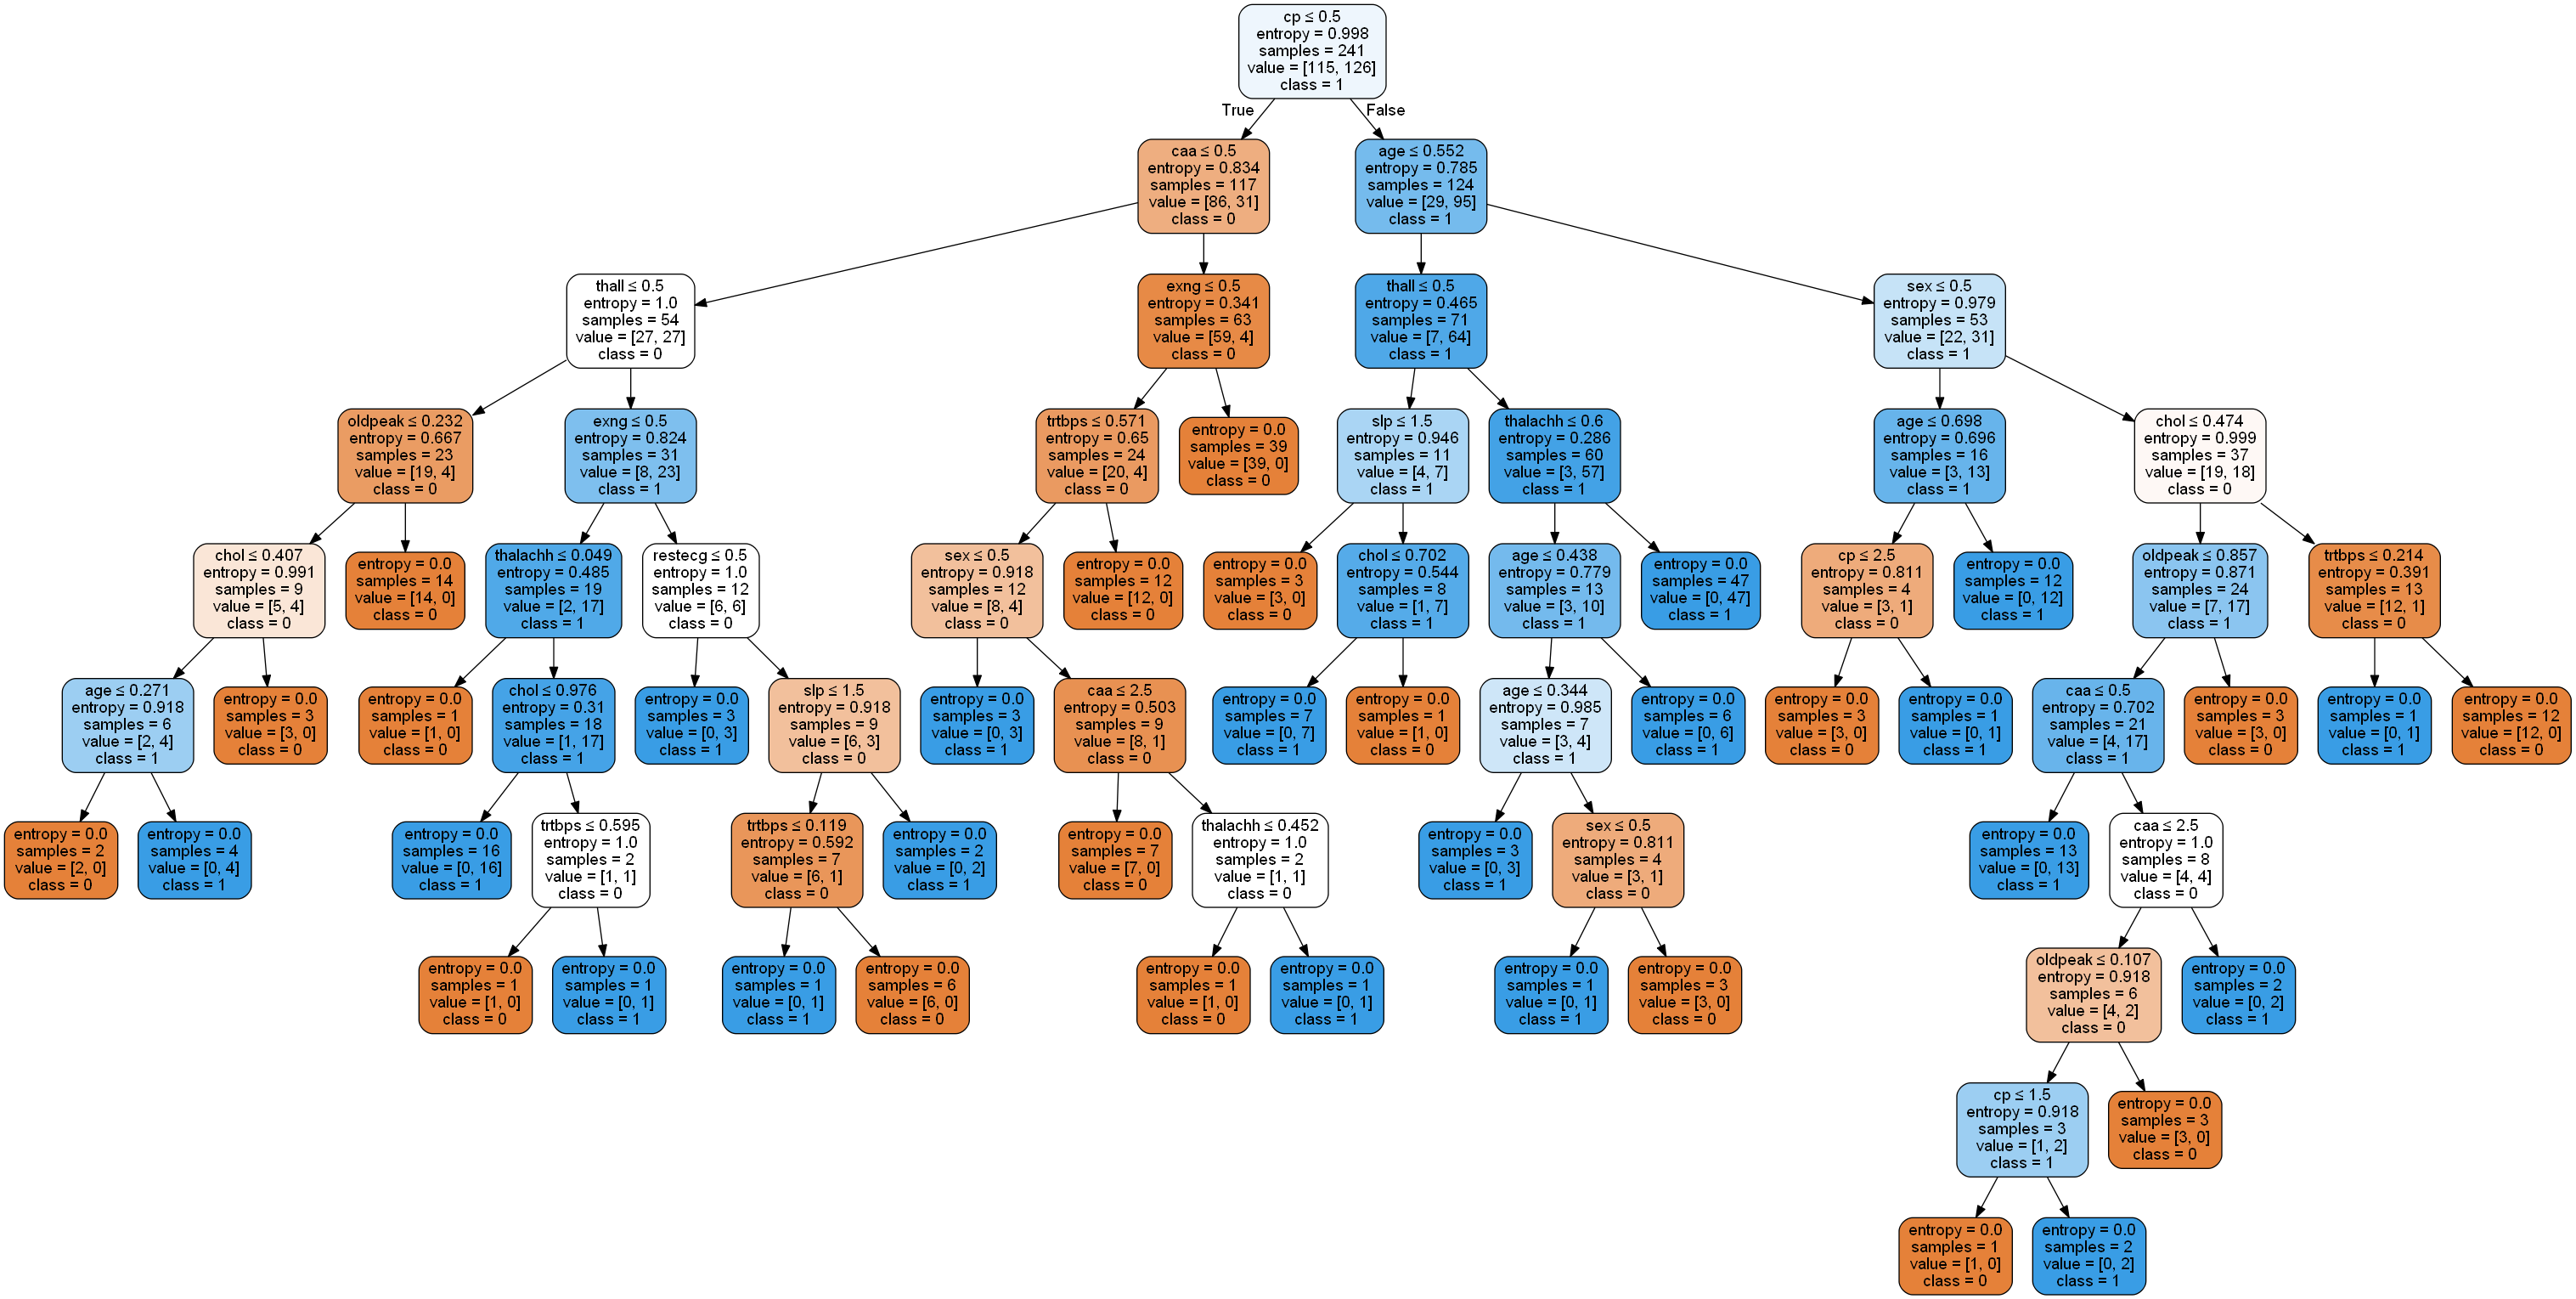

In [48]:
# Generating the decision tree

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heartattack.png')
Image(graph.create_png())

# SVM Model

In [49]:
# SVM classifier

clf = svm.SVC() # Create SVM classifier

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
svm_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",svm_accuracy,'%')

svm_precision = round(precision_score(y_test, y_pred)*100,2)
svm_recall = round(recall_score(y_test, y_pred)*100,2)
svm_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',svm_precision,'%')
print('\nRecall: ',svm_recall,'%')
print('\nF1 Score:',svm_fScore,'%')


Confusion matrix:
 [[19  4]
 [ 2 36]]

Accuracy: 90.16 %

Precision:  90.0 %

Recall:  94.74 %

F1 Score: 92.31 %


# KNN Classifier

In [50]:
# KNN

clf = KNeighborsClassifier(n_neighbors=5)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
knn_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",knn_accuracy,'%')

knn_precision = round(precision_score(y_test, y_pred)*100,2)
knn_recall = round(recall_score(y_test, y_pred)*100,2)
knn_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',knn_precision,'%')
print('\nRecall: ',knn_recall,'%')
print('\nF1 Score:',knn_fScore,'%')


Confusion matrix:
 [[22  1]
 [ 2 36]]

Accuracy: 95.08 %

Precision:  97.3 %

Recall:  94.74 %

F1 Score: 96.0 %


# Logistic Regression

In [51]:
# Logistic Regression

clf = LogisticRegression(solver='lbfgs') 

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",lr_accuracy,'%')

lr_precision = round(precision_score(y_test, y_pred)*100,2)
lr_recall = round(recall_score(y_test, y_pred)*100,2)
lr_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',lr_precision,'%')
print('\nRecall: ',lr_recall,'%')
print('\nF1 Score:',lr_fScore,'%')


Confusion matrix:
 [[18  5]
 [ 3 35]]

Accuracy: 86.89 %

Precision:  87.5 %

Recall:  92.11 %

F1 Score: 89.74 %


# Naive Bayes

In [52]:
# Naive Bayes

clf = GaussianNB() # Naive Bayes

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
nb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",nb_accuracy,'%')

nb_precision = round(precision_score(y_test, y_pred)*100,2)
nb_recall = round(recall_score(y_test, y_pred)*100,2)
nb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',nb_precision,'%')
print('\nRecall: ',nb_recall,'%')
print('\nF1 Score:',nb_fScore,'%')


Confusion matrix:
 [[19  4]
 [ 2 36]]

Accuracy: 90.16 %

Precision:  90.0 %

Recall:  94.74 %

F1 Score: 92.31 %


# Random Forest

In [53]:
# Random Forest

clf=RandomForestClassifier(n_estimators=100,criterion =  "entropy")

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",rf_accuracy,'%')

rf_precision = round(precision_score(y_test, y_pred)*100,2)
rf_recall = round(recall_score(y_test, y_pred)*100,2)
rf_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',rf_precision,'%')
print('\nRecall: ',rf_recall,'%')
print('\nF1 Score:',rf_fScore,'%')


Confusion matrix:
 [[19  4]
 [ 4 34]]

Accuracy: 86.89 %

Precision:  89.47 %

Recall:  89.47 %

F1 Score: 89.47 %


# XGBoost


In [54]:

# XGBoost

clf=XGBClassifier(n_estimators=30)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',c_matrix)

# Accuracy
xgb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",xgb_accuracy,'%')

xgb_precision = round(precision_score(y_test, y_pred)*100,2)
xgb_recall = round(recall_score(y_test, y_pred)*100,2)
xgb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',xgb_precision,'%')
print('\nRecall: ',xgb_recall,'%')
print('\nF1 Score:',xgb_fScore,'%')


[11:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Confusion matrix:
 [[21  2]
 [ 4 34]]

Accuracy: 90.16 %

Precision:  94.44 %

Recall:  89.47 %

F1 Score: 91.89 %


# Model Evaluation

In [55]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'],
                    'Accuracy %':[lr_accuracy,nb_accuracy,rf_accuracy,xgb_accuracy,knn_accuracy,dt_accuracy,svm_accuracy],
                    'Precision %':[lr_precision,nb_precision,rf_precision,xgb_precision,knn_precision,dt_precision,svm_precision],
                    'Recall %':[lr_recall,nb_recall,rf_recall,xgb_recall,knn_recall,dt_recall,svm_recall],
                    'F1 Score %':[lr_fScore,nb_fScore,rf_fScore,xgb_fScore,knn_fScore,dt_fScore,svm_fScore]})

model_ev.sort_values(by='Accuracy %',ignore_index=True,inplace=True)
model_ev



,Model,Accuracy %,Precision %,Recall %,F1 Score %
0,Decision Tree,81.97,96.55,73.68,83.58
1,Logistic Regression,86.89,87.50,92.11,89.74
2,Random Forest,86.89,89.47,89.47,89.47
3,Naive Bayes,90.16,90.00,94.74,92.31
4,Extreme Gradient Boost,90.16,94.44,89.47,91.89
5,Support Vector Machine,90.16,90.00,94.74,92.31
6,K-Nearest Neighbour,95.08,97.30,94.74,96.00


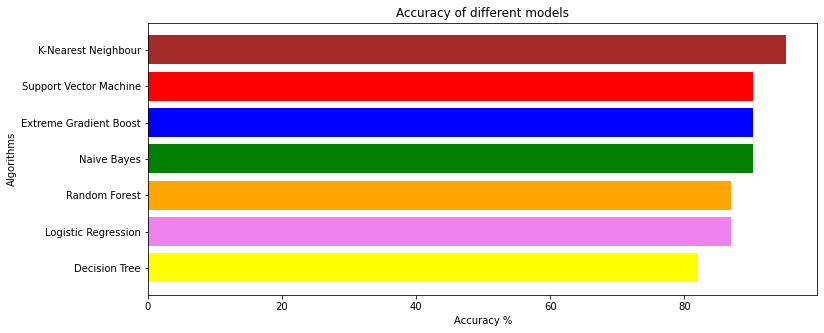

In [56]:
# Barplot for Accuracy of different models

plt.figure(figsize=(12,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev['Model'],model_ev['Accuracy %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()


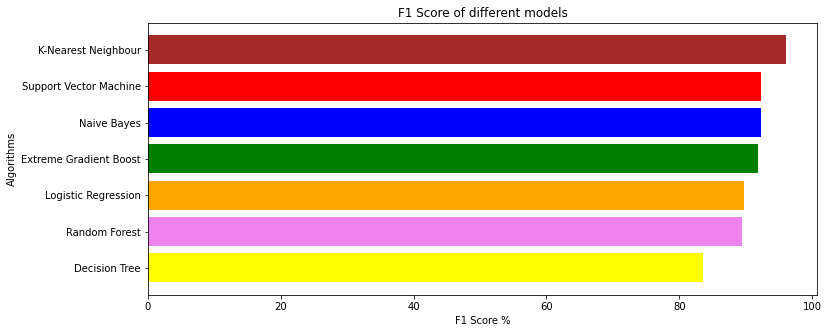

In [57]:
# Barplot for F1 Score of different models

model_fs=model_ev.sort_values(by='F1 Score %',ignore_index=True)
plt.figure(figsize=(12,5))
plt.title("F1 Score of different models")
plt.xlabel("F1 Score %")
plt.ylabel("Algorithms")
plt.barh(model_fs['Model'],model_fs['F1 Score %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()


# Out of seven machine learning algorithms we applied, we conclude that KNN classifier performs the best on this dataset with 95.08% Accuracy and 96% F1 score.

OBSERVATIONS:

1. In feature scaling, we tried by applying both StandardScaler and MinMaxscaler. The highest accuracy obtained for StandardScaler was 91.8% for SVM model whereas for MinMaxScaler highest accuracy obtained was 95.08% for KNN model.

2. We explored the feature selection technique (i.e. by droping the features having low correlation with output), but it didn't do much on the improvement of the accuracy.

3. We also tried different split ratios and random state as well, and for this dataset 80%-20%(train-test) and random_state=3 was the best.

4. For handling the outlier in Thall attribute (categorical), we tried trimming method, outlier replacement with mode value and KNNImputer. Out these, Mode value replacement and KNNImputer performed well and finally we chose KNN Imputer.